# Recurrent Neural Networks!

In this part, we will take part in a real R&D process to build a robust and relevant Recurrent Neural Network. Here is the plan of attack:

- We will study the theory and get the Intuition of RNNs.

- We will start by building a simple RNN, our first attempt.

- We will observe the results to identify possible issues and ways of improvement, so that eventually this simple RNN will be well improved in the last section.

- We will learn how to evaluate a RNN model, and more generally a Regression model.




## Part 1 - Data Preprocessing

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Import the dataset
dataset_train = pd.read_csv('https://raw.githubusercontent.com/Nath19/Deep_Learning/master/dataset/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values #to have a numpy array


In [3]:
dataset_train.shape

(1258, 6)

In [4]:
list(dataset_train.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [7]:
#Feature Scaling
#Normalisation is better for RNN
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)


In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
# Creating a data structure with 60 timesteps and 1 output
#we have to try different timesteps. We saw that 60 was a good shot
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)



In [10]:
X_train.shape

(1198, 60)

In [11]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building the RNN


In [12]:
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
/Users/nathanamar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nathanamar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nathanamar/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/nathanamar/anaconda3/lib/python3.7

In [13]:
# Initialising the RNN
regressor = Sequential()

#Adding the first LSTM layer and some droupout regularization to avoid overfitting
#units -> number of neurons in our LSTM layer
#Dropout -> 0.2 is a good choice. In this case 20% of 50 so 10 neurons will not used
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [15]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0406
Epoch 2/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0047
Epoch 6/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0037
Epoch 11/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0042
Epoc

1198/1198 [==============================] - 16s 13ms/step - loss: 0.0014
Epoch 93/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0015
Epoch 94/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0013
Epoch 95/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0012
Epoch 97/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0013


## Part 3 - Making the predictions and visualising the results


In [16]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('https://raw.githubusercontent.com/Nath19/Deep_Learning/master/dataset/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

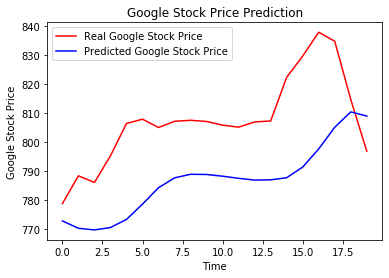

In [18]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()